In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [249]:
#importing dataset
df = pd.read_csv(r'/Users/navo/Documents/nPlan/astronaut_data/missions.csv')
df.head()

,Unnamed: 0,ID,Company Name,Location,Date,Detail,Status Rocket,Cost,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [250]:
#dropping unnamed and ID columns
df = df.drop(df.columns[0:2], axis=1)
df

,Company Name,Location,Date,Detail,Status Rocket,Cost,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


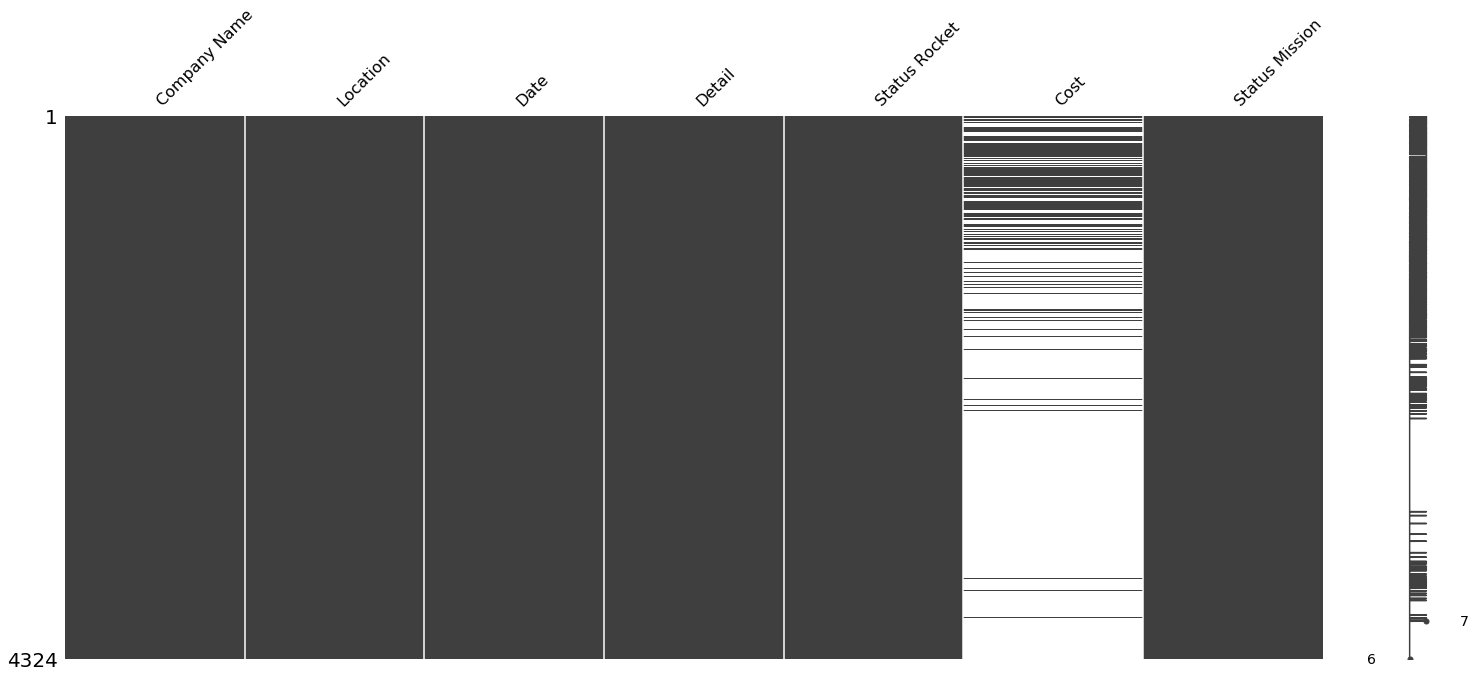

In [251]:
#idenfity/visualisg missing data
import missingno as msno
msno.matrix(df)

In [252]:
#split out the Location and Date column to extract more meaningful and tractable data
df['Country'] = df['Location'].apply(lambda x:x.split()[-1])
df['Day'] = df['Date'].apply(lambda x:x.split()[0])
df['Month'] = df['Date'].apply(lambda x:x.split()[1])
df['Date1'] = df['Date'].apply(lambda x:x.split()[2])
df['Year'] = df['Date'].apply(lambda x:x.split()[3])

In [253]:
#split out the Company and Model column to extract more meaningful and tractable data
df['Company'] = df['Detail'].apply(lambda x:x.partition("|")[0])
df['Model'] = df['Detail'].apply(lambda x:x.partition("|")[2])
df['Model'].describe()

count     4324
unique    4257
top        DSP
freq         8
Name: Model, dtype: object

In [254]:
df.columns

Index(['Company Name', 'Location', 'Date', 'Detail', 'Status Rocket', 'Cost',
       'Status Mission', 'Country', 'Day', 'Month', 'Date1', 'Year', 'Company',
       'Model'],
      dtype='object')

In [255]:
#Relabel Columns as one of them had an additional space in the name
df.columns = ['Company Name', 'Location', 'Date', 'Detail', 'Status Rocket', 'Cost',
       'Status Mission', 'Country', 'Day', 'Month', 'Date1', 'Year', 'Company',
       'Model']

In [256]:
#cast the costs as a float, removing commas
df.Cost = df.Cost.astype(str).replace(',','').astype(float)
df.Cost

0        50.00
1        29.75
2          NaN
3        65.00
4       145.00
         ...  
4319       NaN
4320       NaN
4321       NaN
4322       NaN
4323       NaN
Name: Cost, Length: 4324, dtype: float64

(array([724.,  78., 147.,   0.,   0.,   0.,  13.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([   5.3 ,  171.79,  338.28,  504.77,  671.26,  837.75, 1004.24,
        1170.73, 1337.22, 1503.71, 1670.2 , 1836.69, 2003.18, 2169.67,
        2336.16, 2502.65, 2669.14, 2835.63, 3002.12, 3168.61, 3335.1 ,
        3501.59, 3668.08, 3834.57, 4001.06, 4167.55, 4334.04, 4500.53,
        4667.02, 4833.51, 5000.  ]),
 <a list of 30 Patch objects>)

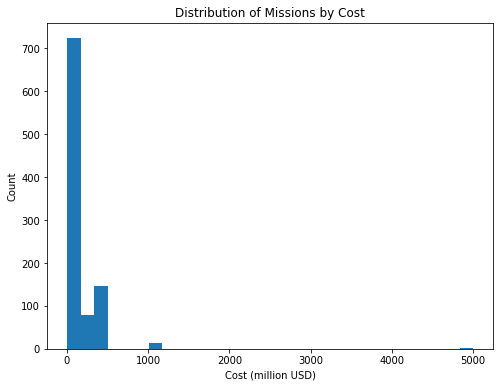

In [294]:
#Histogram of cost of missions
plt.figure(figsize=(8,6))
plt.title('Distribution of Missions by Cost')
plt.xlabel('Cost (million USD)')
plt.ylabel('Count')
plt.hist(df.Cost, bins=30)

(array([  9.,  19.,   0.,   1.,   1.,   2.,  28., 141.,  88., 119., 138.,
         24.,  39.,  67.,  33.,  93.,   0.,   0.,  11., 136.,   0.,   0.,
          0.,  13.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([1.66770682, 1.89602303, 2.12433925, 2.35265546, 2.58097167,
        2.80928788, 3.03760409, 3.26592031, 3.49423652, 3.72255273,
        3.95086894, 4.17918516, 4.40750137, 4.63581758, 4.86413379,
        5.09245001, 5.32076622, 5.54908243, 5.77739864, 6.00571486,
        6.23403107, 6.46234728, 6.69066349, 6.9189797 , 7.14729592,
        7.37561213, 7.60392834, 7.83224455, 8.06056077, 8.28887698,
        8.51719319]),
 <a list of 30 Patch objects>)

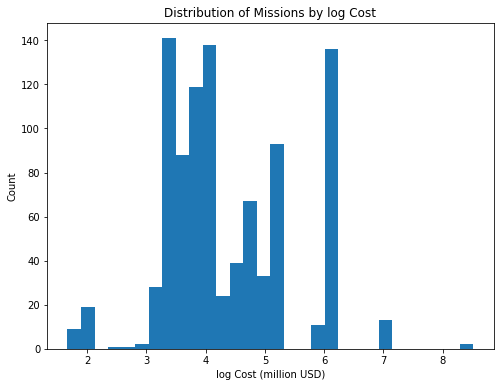

In [263]:
#Histogram of log cost of missions
plt.figure(figsize=(8,6))
plt.title('Distribution of Missions by log Cost')
plt.xlabel('log Cost (million USD)')
plt.ylabel('Count')
plt.hist(np.log(df.Cost), bins=30)

In [50]:
df.sort_values('Cost', ascending=False)[0:10]

,Company Name,Location,Date,Detail,Status Rocket,Cost,Status Mission,Country,Day,Month,Date1,Year,Company,Model
1916,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan","Tue Nov 15, 1988 03:00 UTC",Energiya/Buran | Buran,StatusRetired,5000.0,Success,Kazakhstan,Tue,Nov,"15,",1988,Energiya/Buran,Buran
2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan","Fri May 15, 1987 17:30 UTC",Energiya/Polyus | Polyus Space Station,StatusRetired,5000.0,Success,Kazakhstan,Fri,May,"15,",1987,Energiya/Polyus,Polyus Space Station
3545,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Wed Jul 16, 1969 13:32 UTC",Saturn V | Apollo 11,StatusRetired,1160.0,Success,USA,Wed,Jul,"16,",1969,Saturn V,Apollo 11
3603,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sat Dec 21, 1968 12:51 UTC",Saturn V | Apollo 8,StatusRetired,1160.0,Success,USA,Sat,Dec,"21,",1968,Saturn V,Apollo 8
3475,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sat Apr 11, 1970 19:13 UTC",Saturn V | Apollo 13,StatusRetired,1160.0,Success,USA,Sat,Apr,"11,",1970,Saturn V,Apollo 13
3511,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Fri Nov 14, 1969 16:22 UTC",Saturn V | Apollo 12,StatusRetired,1160.0,Success,USA,Fri,Nov,"14,",1969,Saturn V,Apollo 12
3243,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Apr 16, 1972 17:54 UTC",Saturn V | Apollo 16,StatusRetired,1160.0,Success,USA,Sun,Apr,"16,",1972,Saturn V,Apollo 16
3560,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Sun May 18, 1969 16:49 UTC",Saturn V | Apollo 10,StatusRetired,1160.0,Success,USA,Sun,May,"18,",1969,Saturn V,Apollo 10
3180,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Tue Dec 19, 1972 19:24 UTC",Saturn V | Apollo 17,StatusRetired,1160.0,Success,USA,Tue,Dec,"19,",1972,Saturn V,Apollo 17
3584,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Mon Mar 03, 1969 16:00 UTC",Saturn V | Apollo 9,StatusRetired,1160.0,Success,USA,Mon,Mar,"03,",1969,Saturn V,Apollo 9


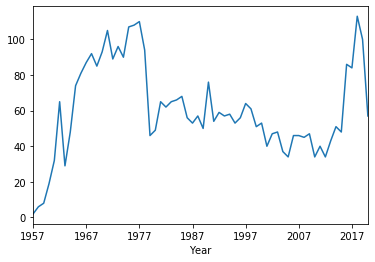

In [54]:
df[df['Status Mission'] == 'Success'].groupby('Year')['Status Mission'].count().plot(kind='line')

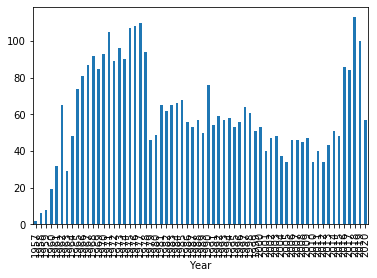

In [55]:
df[df['Status Mission'] == 'Success'].groupby('Year')['Status Mission'].count().plot(kind='bar')

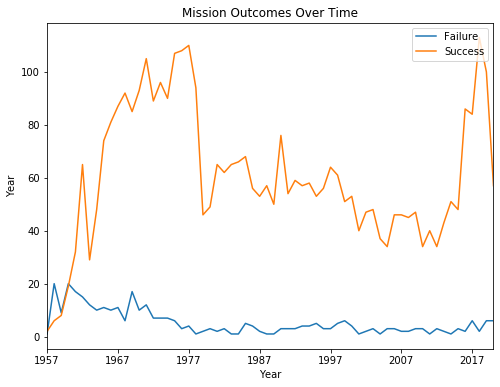

In [266]:
#Mission successes and failures over time
plt.figure(figsize=(8,6))
plt.title('Mission Outcomes Over Time')
plt.xlabel('Count')
plt.ylabel('Year')
df[df['Status Mission'] == 'Failure'].groupby('Year')['Status Mission'].count().plot(kind='line', label = 'Failure')
df[df['Status Mission'] == 'Success'].groupby('Year')['Status Mission'].count().plot(kind='line', label = 'Success')
plt.legend(loc='upper right')
plt.show()

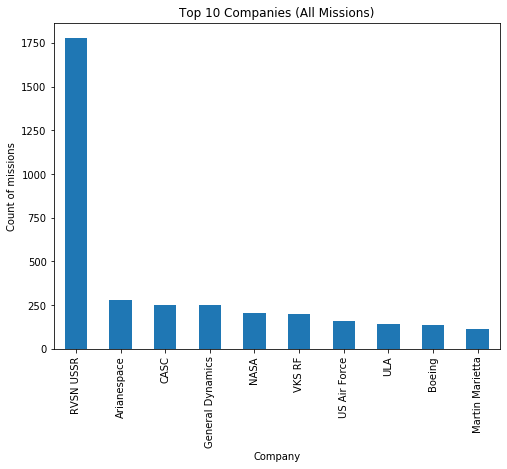

In [268]:
#Plot of top 10 companies
plt.figure(figsize=(8,6))
plt.title('Top 10 Companies (All Missions)')
plt.xlabel('Company')
plt.ylabel('Count of missions')
df['Company Name'].value_counts().sort_values(ascending = False)[0:10].plot(kind = 'bar')

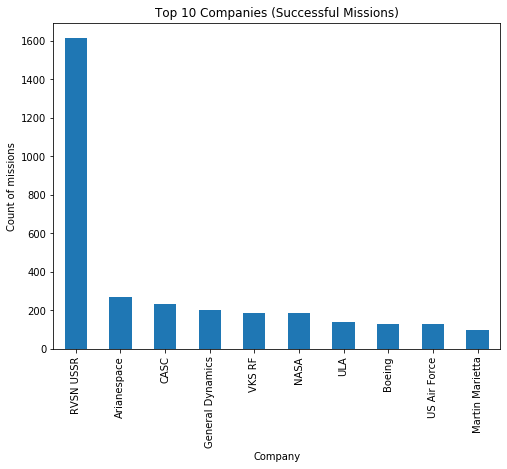

In [269]:
#Plot of top 10 companies with successful missions
plt.figure(figsize=(8,6))
plt.title('Top 10 Companies (Successful Missions)')
plt.xlabel('Company')
plt.ylabel('Count of missions')
df[df['Status Mission'] == 'Success']['Company Name'].value_counts().sort_values(ascending = False)[0:10].plot(kind = 'bar')

<Figure size 576x432 with 0 Axes>

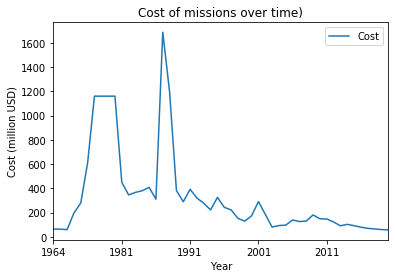

<Figure size 576x432 with 0 Axes>

In [273]:
#Visualizing cost of missions over time
df[df['Cost'].notnull()].groupby(df['Year']).mean().plot(kind='line')
plt.title('Cost of missions over time)')
plt.xlabel('Year')
plt.ylabel('Cost (million USD)')
plt.figure(figsize=(8,6))

<Figure size 1080x720 with 0 Axes>

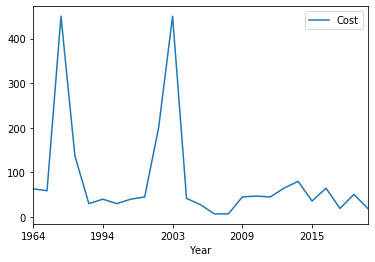

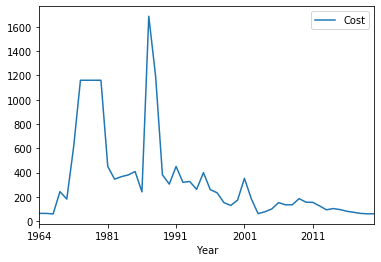

In [78]:
plt.figure(figsize=(15,10))
df[(df['Cost'].notnull())&(df['Status Mission'] == 'Failure')].groupby(df['Year']).mean().plot(kind='line', label = 'Failure')
df[(df['Cost'].notnull())&(df['Status Mission'] == 'Success')].groupby(df['Year']).mean().plot(kind='line', label = 'Success')
plt.legend()
plt.show()

In [298]:
#Summary of cost statistics for failed missions
df[(df['Cost'].notnull())&(df['Status Mission'] == 'Failure')].describe()

,Cost,y
count,36.000000,36.0
mean,67.359444,0.0
std,100.985089,0.0
min,7.000000,0.0
25%,27.475000,0.0
50%,40.900000,0.0
75%,60.057500,0.0
max,450.000000,0.0


In [297]:
#Summary of cost statistics for successful missions
df[(df['Cost'].notnull())&(df['Status Mission'] == 'Success')].describe()

,Cost,y
count,910.000000,910.0
mean,157.551143,1.0
std,293.429514,0.0
min,5.300000,1.0
25%,40.000000,1.0
50%,63.955000,1.0
75%,200.000000,1.0
max,5000.000000,1.0


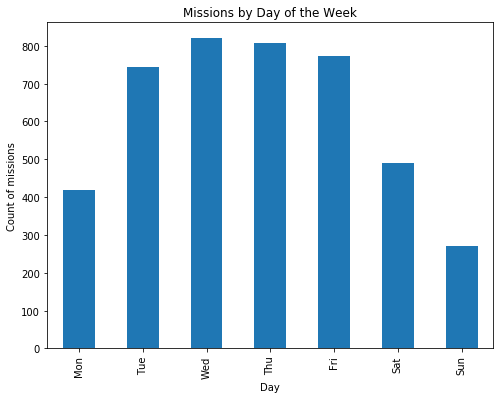

In [276]:
#Visualizing which day is the most popular for a mission
plt.figure(figsize=(8,6))
plt.title('Missions by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Count of missions')
order1 = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
df['Day'].value_counts().loc[order1].plot(kind='bar')

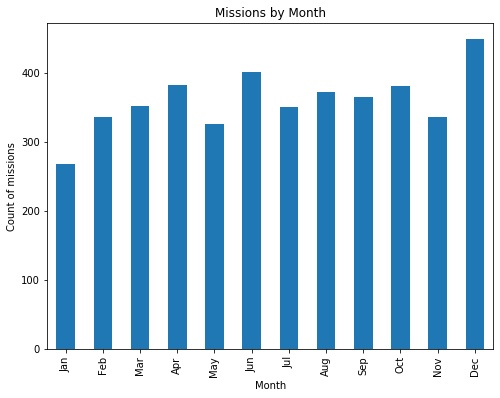

In [277]:
#Visualizing which month is the most popular for a mission
plt.figure(figsize=(8,6))
plt.title('Missions by Month')
plt.xlabel('Month')
plt.ylabel('Count of missions')
order2 = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df['Month'].value_counts().loc[order2].plot(kind='bar')

In [279]:
#create a new column y which is a binary outcome of missions success/failure
df['y'] = np.where(df['Status Mission'] == 'Success',1,0)
df

,Company Name,Location,Date,Detail,Status Rocket,Cost,Status Mission,Country,Day,Month,Date1,Year,Company,Model,y
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,Fri,Aug,"07,",2020,Falcon 9 Block 5,Starlink V1 L9 & BlackSky,1
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,Thu,Aug,"06,",2020,Long March 2D,Gaofen-9 04 & Q-SAT,1
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,Tue,Aug,"04,",2020,Starship Prototype,150 Meter Hop,1
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,Thu,Jul,"30,",2020,Proton-M/Briz-M,Ekspress-80 & Ekspress-103,1
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,Thu,Jul,"30,",2020,Atlas V 541,Perseverance,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,Wed,Feb,"05,",1958,Vanguard,Vanguard TV3BU,0
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,Sat,Feb,"01,",1958,Juno I,Explorer 1,1
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,Fri,Dec,"06,",1957,Vanguard,Vanguard TV3,0
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,Sun,Nov,"03,",1957,Sputnik 8K71PS,Sputnik-2,1


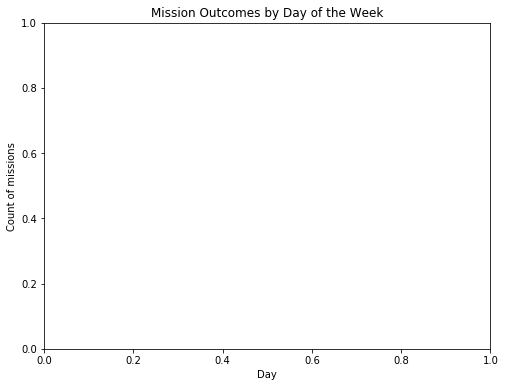

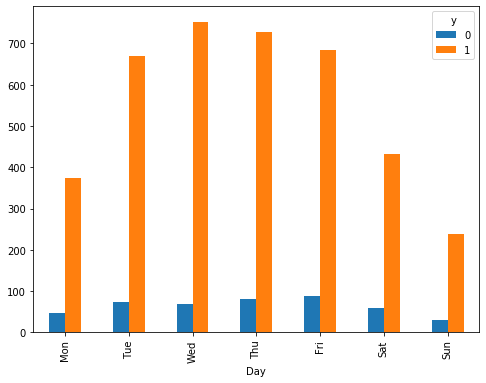

In [292]:
#Visualizing whether there is a difference between success/failure based on launch day
plt.figure(figsize=(8,6))
plt.title('Mission Outcomes by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Count of missions')
pd.crosstab(df.Day, df.y).loc[order1].plot(kind='bar', figsize = (8,6))

In [282]:
#convert cost into a catgeorical variable by bucketing based on pre-defined ranges
dftest = df.dropna()
costbins = np.array([0,20,50,100,200,900,1800])
costbuckets = np.digitize(dftest.Cost, costbins)
dftest['costbuckets'] = costbuckets
dftest

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Company Name,Location,Date,Detail,Status Rocket,Cost,Status Mission,Country,Day,Month,Date1,Year,Company,Model,y,costbuckets
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,Fri,Aug,"07,",2020,Falcon 9 Block 5,Starlink V1 L9 & BlackSky,1,3
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,Thu,Aug,"06,",2020,Long March 2D,Gaofen-9 04 & Q-SAT,1,2
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,Thu,Jul,"30,",2020,Proton-M/Briz-M,Ekspress-80 & Ekspress-103,1,3
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,Thu,Jul,"30,",2020,Atlas V 541,Perseverance,1,4
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,Sat,Jul,"25,",2020,Long March 4B,"Ziyuan-3 03, Apocalypse-10 & NJU-HKU 1",1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.00,Success,USA,Fri,Jul,"29,",1966,Titan IIIB,KH-8,1,3
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,USA,Thu,May,"06,",1965,Titan IIIA,LES 2 & LCS 1,1,3
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success,USA,Thu,Feb,"11,",1965,Titan IIIA,LES 1,1,3
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success,USA,Thu,Dec,"10,",1964,Titan IIIA,Transtage 2,1,3


In [283]:
dftest.y.value_counts()

1    910
0     54
Name: y, dtype: int64

In [284]:
dftest.costbuckets.describe()
train = pd.concat([companyname, country, day, month, year, company, costbucket, dftest.y],axis=1)

In [286]:
#one-hot encoding of dataset for select variables
companyname = pd.get_dummies(dftest['Company Name'], drop_first = True)
country = pd.get_dummies(dftest['Country'], drop_first = True)
day = pd.get_dummies(dftest['Day'], drop_first = True)
month = pd.get_dummies(dftest['Month'], drop_first = True)
year = pd.get_dummies(dftest['Year'], drop_first = True)
company = pd.get_dummies(dftest['Company'], drop_first = True)
costbucket = pd.get_dummies(dftest['costbuckets'], drop_first = True)
train = pd.concat([companyname, country, day, month, year, company, costbucket, dftest.y],axis=1)
train

,Boeing,CASC,EER,ESA,Eurockot,ExPace,ILS,ISRO,JAXA,Kosmotras,...,Titan IIIA,Titan IIIB,Vega,2,3,4,5,6,7,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3855,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3971,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3993,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4000,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [288]:
#creating training dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('y',axis=1), 
                                                    train['y'], test_size=0.15, 
                                                    random_state= 101)
X_train

,Boeing,CASC,EER,ESA,Eurockot,ExPace,ILS,ISRO,JAXA,Kosmotras,...,Titan II(23)G,Titan IIIA,Titan IIIB,Vega,2,3,4,5,6,7
394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
978,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
285,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
238,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1591,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
717,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [242]:
#running logistic regression on training dataset
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [289]:
#printing report of logistic regression
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.94      1.00      0.97       136

    accuracy                           0.94       145
   macro avg       0.97      0.56      0.59       145
weighted avg       0.95      0.94      0.92       145



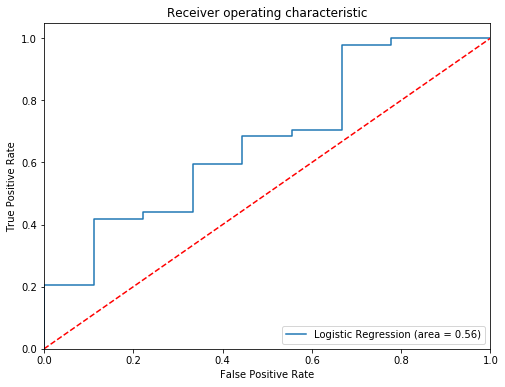

In [291]:
#generating ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()